In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

/tmp/ipykernel_2399829/1571245339.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
solar_df = pd.read_csv("run1.csv")

In [3]:
solar_df['DateTime'] = pd.to_datetime(solar_df['DateTime'])
solar_df['Time'] = solar_df['DateTime'] - solar_df['DateTime'].min()
solar_df['TimeMins'] = solar_df['Time'].dt.total_seconds() / 60

In [5]:
solar_df = solar_df.drop([0,1])

In [6]:
solar_df = solar_df.drop([53,54])

In [8]:
solar_df_averaged = solar_df.groupby(np.arange(len(solar_df)) // 3).mean()

In [10]:
solar_df2 = pd.read_csv("run2.csv")

In [11]:
solar_df2 = solar_df2.drop([0,1])

In [13]:
solar_df2['DateTime'] = pd.to_datetime(solar_df2['DateTime'])
solar_df2['Time'] = solar_df2['DateTime'] - solar_df2['DateTime'].min()
solar_df2['TimeMins'] = solar_df2['Time'].dt.total_seconds() / 60

In [15]:
solar_df2['PM2.5'] = pd.to_numeric(solar_df2['PM2.5'], errors='coerce')

In [16]:
solar_df_averaged2 = solar_df2.groupby(np.arange(len(solar_df2)) // 3).mean()

In [17]:
solar_df3 = pd.read_csv("run3.csv")

In [18]:
solar_df3 = solar_df3.drop([0,1, 23])

In [19]:
solar_df3['DateTime'] = pd.to_datetime(solar_df3['DateTime'])
solar_df3['Time'] = solar_df3['DateTime'] - solar_df3['DateTime'].min()
solar_df3['TimeMins'] = solar_df3['Time'].dt.total_seconds() / 60

In [20]:
solar_df3['PM2.5'] = pd.to_numeric(solar_df3['PM2.5'], errors='coerce')

In [21]:
solar_df_averaged3 = solar_df3.groupby(np.arange(len(solar_df3)) // 3).mean()

In [22]:
solar_df_concat = pd.concat([solar_df_averaged3, solar_df_averaged2, solar_df_averaged])

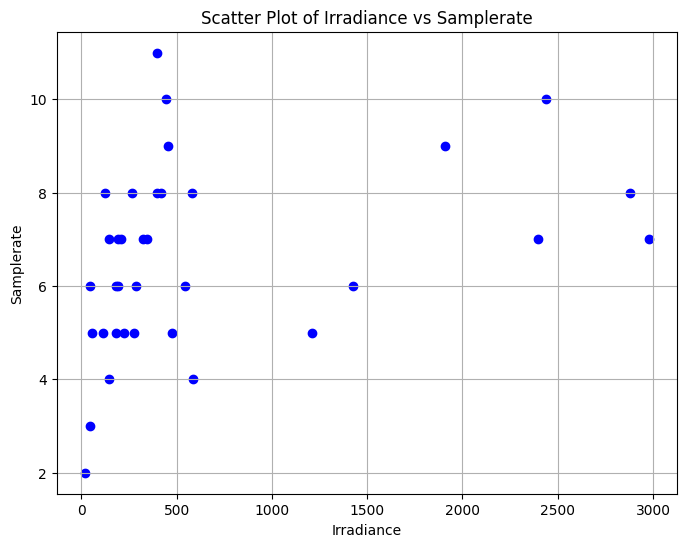

In [23]:
# Scatter plot of 'irradiance' vs 'samplerate'
plt.figure(figsize=(8, 6))
plt.scatter(solar_df_concat['irradiance'], solar_df_concat['samplerate'], color='blue', marker='o')

# Adding labels and title
plt.xlabel('Irradiance')
plt.ylabel('Samplerate')
plt.title('Scatter Plot of Irradiance vs Samplerate')

# Display the plot
plt.grid(True)
plt.show()